In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from utils.custom_datasets import DelightClassic, MultitaskDataset

In [ ]:
df = pd.read_csv("../data/SERSIC/df_coords_fix.csv", dtype={'objID': 'Int64'})

imgs = np.load("../data/SERSIC/dataset_multires_grizy.npy")
pos = df[["dx","dy"]].values.astype(np.float32)

In [2]:
data = np.load(f"../data/SERSIC/test_delight.npz")
imgs = data['imgs']
sn_pos = data["pos"]

In [2]:
data = np.load(f"../data/SERSIC/X_val_autolabeling_pasquet_mini.npz")
imgs = data['imgs']
sn_pos = data["pos"]
z = data["z"]

In [3]:
dataset =  MultitaskDataset(
                imgs = torch.tensor(imgs),
                sn_pos = torch.tensor(sn_pos),
                z= torch.tensor(z))

In [4]:
dataset2 =  DelightClassic(
                imgs = torch.tensor(imgs),
                sn_pos = torch.tensor(sn_pos))

In [12]:
idx = 25
print((dataset[idx][0] == dataset2[idx][0]).all(), 
      (dataset[idx][1] == dataset2[idx][1]).all())

tensor(True) tensor(True)


In [4]:
transformations = {0: "Original",
                   1: "Rotation 90°",
                   2: "Rotation 180°",
                   3: "Rotation 270°",
                   4: "Horizontal Flip",
                   5: "Horizontal Flip + Rotation 90°",
                   6: "Horizontal Flip + Rotation 180°",
                   7: "Horizontal Flip + Rotation 270°",
                   }

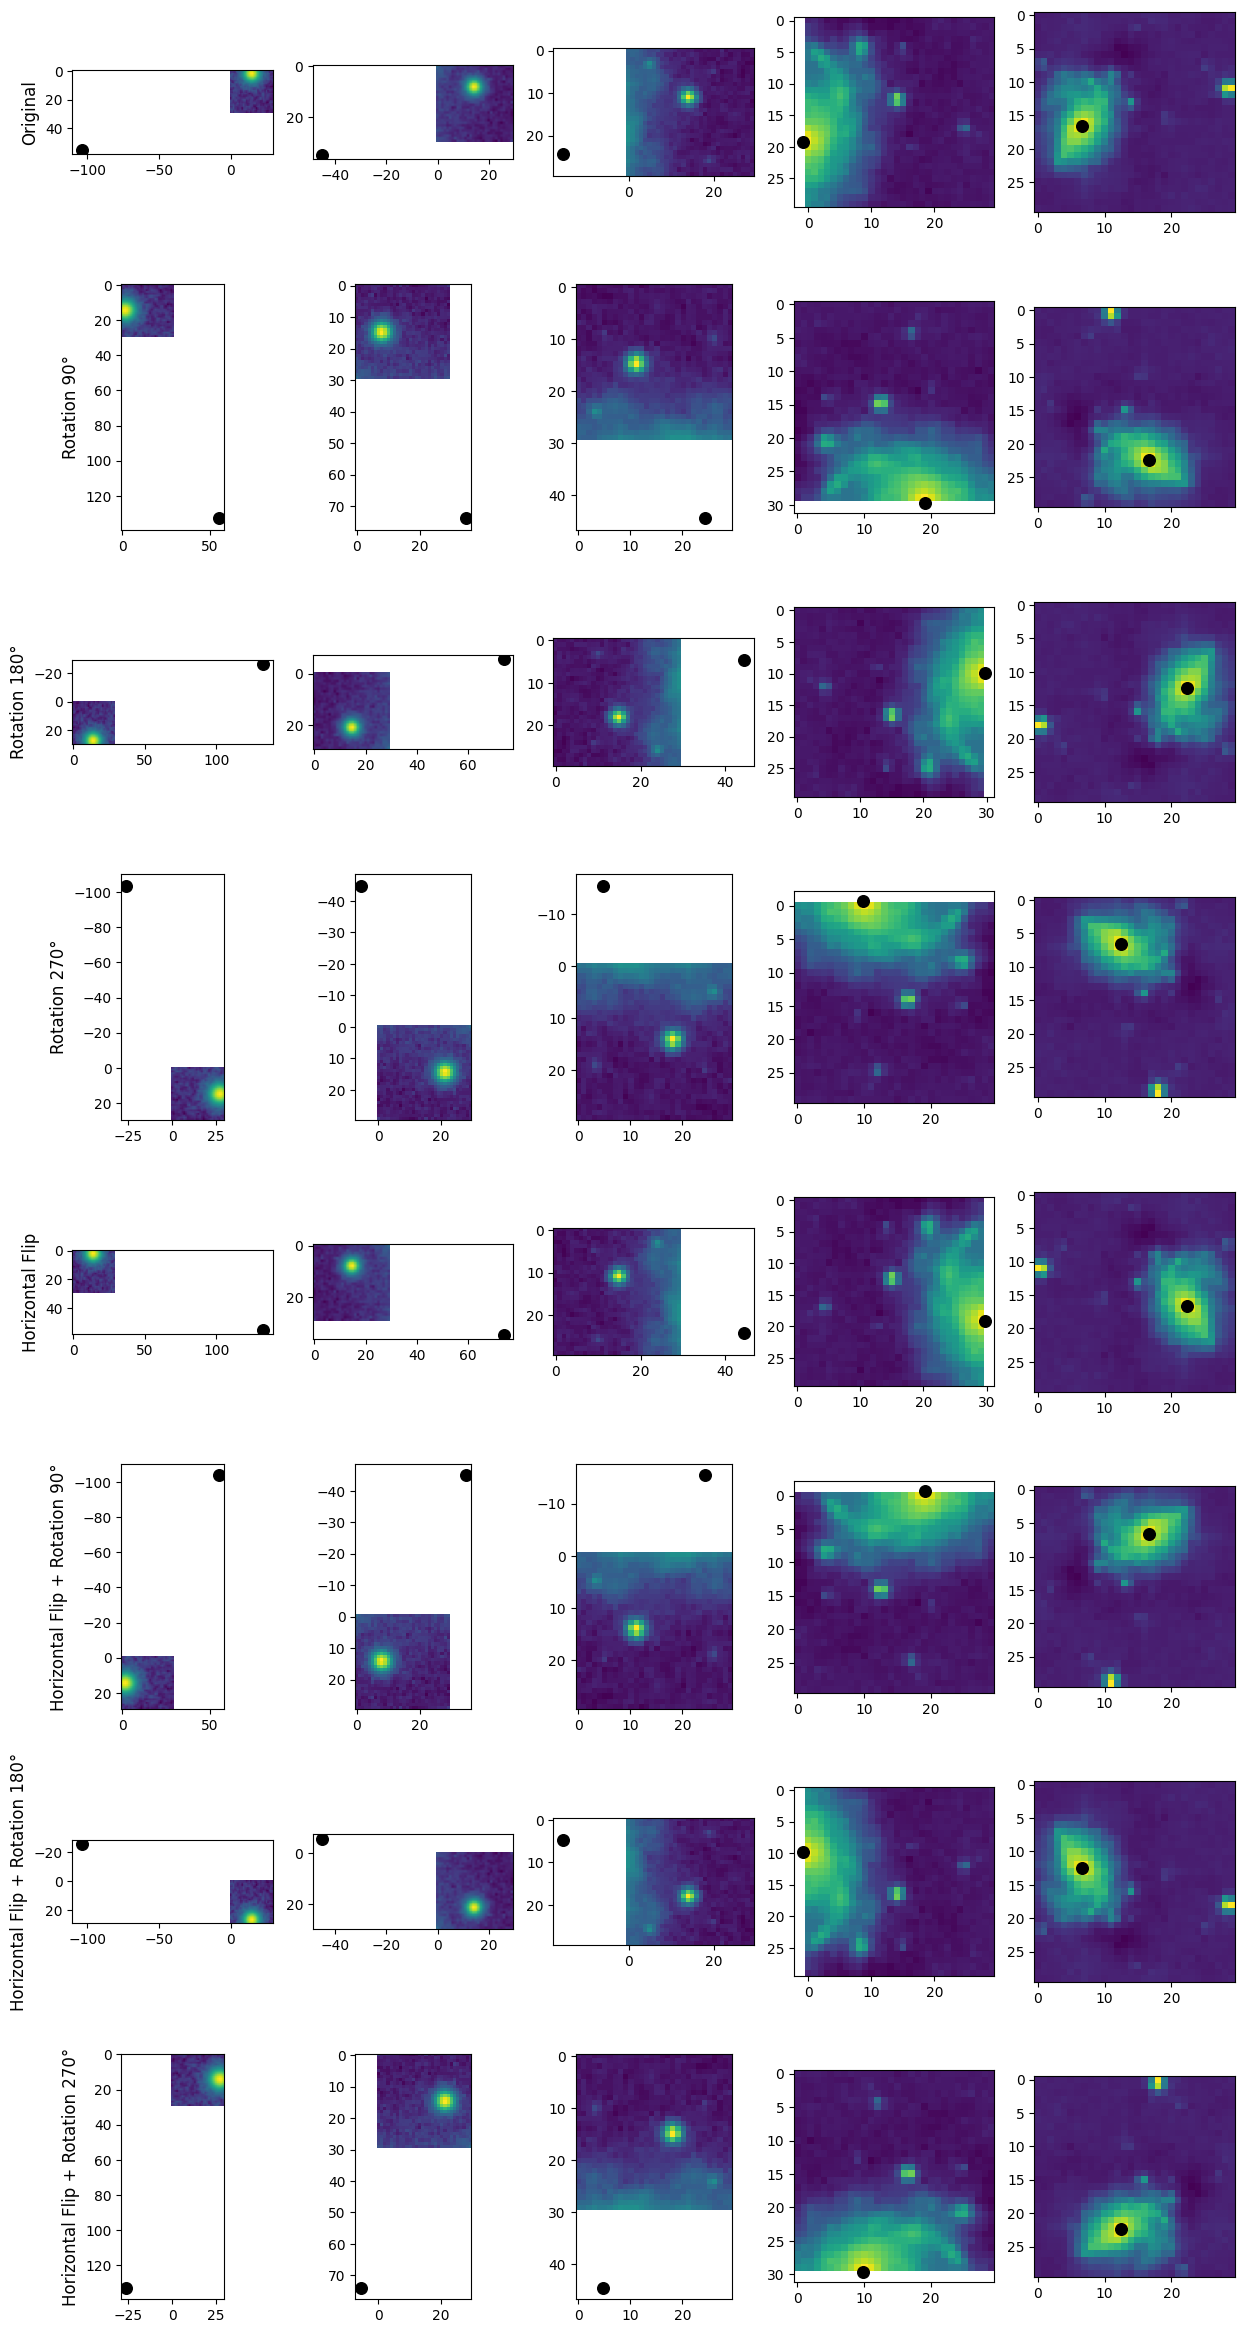

In [6]:
idx = 4087

example = dataset[idx]
centros = np.array([[14,14],[14,15],[15,15],[15,14],[15,14],[14,14],[14,15],[15,15]])

fig, axs = plt.subplots(8,5, figsize=(15,30))

for i, (pos, trans_name) in enumerate(transformations.items()):

    for m in range(5):
        axs[pos][m].imshow(example[0][pos][m][1])
        axs[pos][m].scatter((example[1][pos][0]/(2**m) + centros[i][0]) , (example[1][pos][1]/(2**m)+ centros[i][1]), s=70, color="black")

    axs[pos][0].set_ylabel(trans_name, fontsize=12)  # título a la izquierda

plt.show()